In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [8]:
df.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

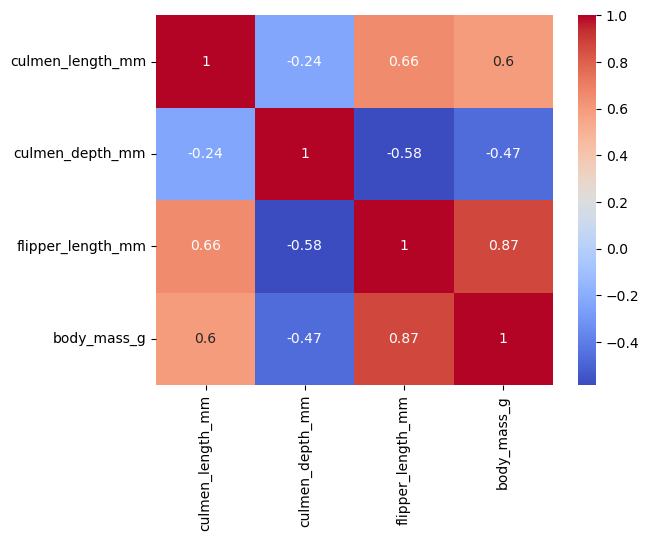

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [11]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [12]:
none_count = df.isna().sum()
none_percent = df.isna().sum() / df.count() * 100 # Hangi kolonda yüzde kaç veri eksik bulduk.

In [13]:
none_table = pd.concat([none_count, none_percent], axis=1)
none_table.columns = ['Counts', 'Percentage']
none_table

,Counts,Percentage
species,0,0.000000
island,0,0.000000
culmen_length_mm,2,0.584795
culmen_depth_mm,2,0.584795
flipper_length_mm,2,0.584795
body_mass_g,2,0.584795
sex,10,2.994012


In [14]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [16]:
##Preprocessing

In [17]:
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imputer.fit_transform(df)

In [18]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [19]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['sex'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1


In [20]:
print(df['sex'].value_counts())
print(df['gender'].value_counts())

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64
2    178
1    165
0      1
Name: gender, dtype: int64


In [21]:
df.drop(labels=['sex'], axis=1, inplace=True)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [22]:
## Data Visualizition

In [23]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [24]:
species_count = df['species'].value_counts().reset_index()
species_count

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


<Axes: xlabel='index', ylabel='species'>

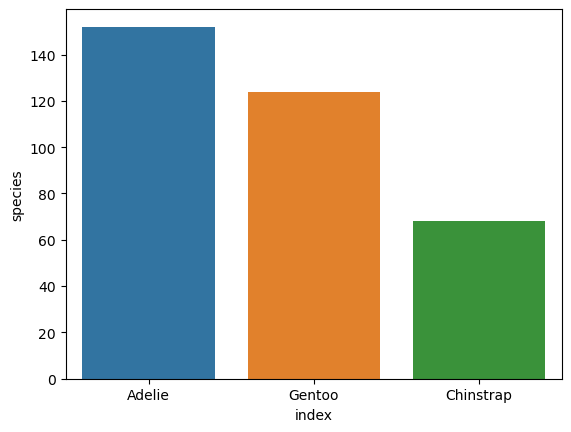

In [25]:
sns.barplot(data=species_count, x='index', y='species')

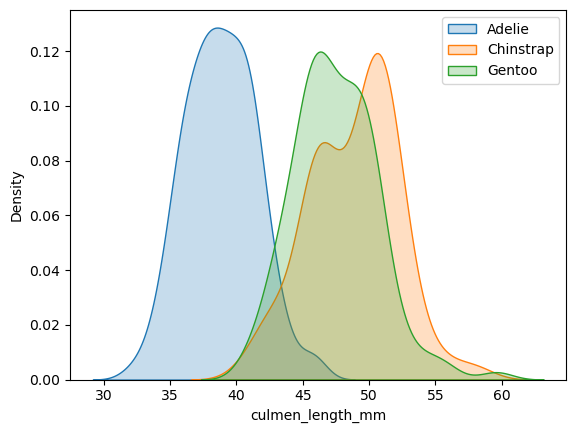

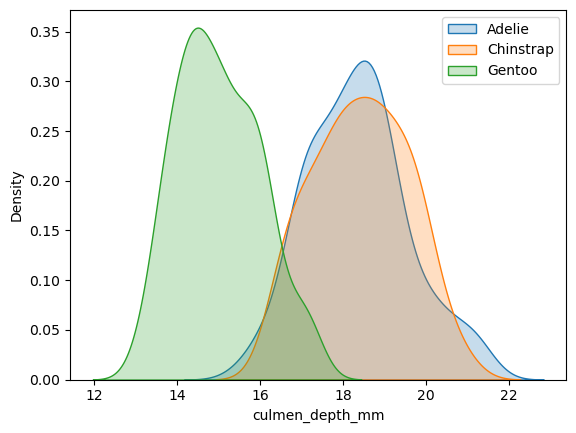

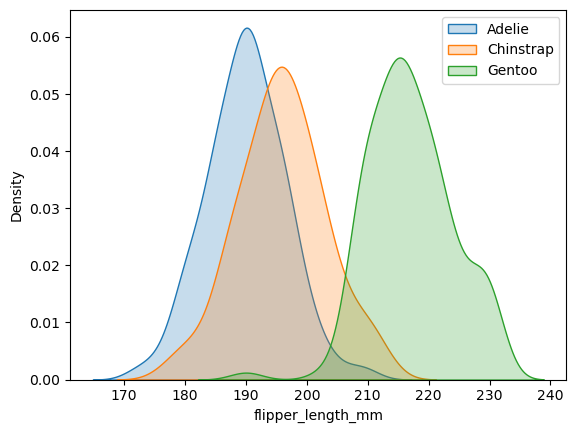

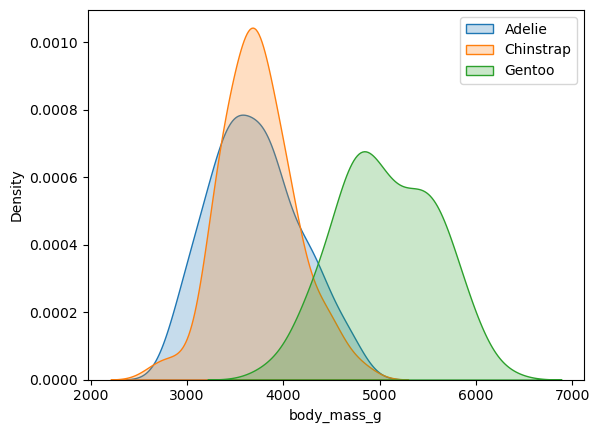

In [26]:
for col in df.columns[2:6]:
    for spec in df['species'].unique():
        sns.kdeplot(df[df['species']==spec][col], legend=True, label=spec, fill=True)
        plt.legend()
    plt.show()    

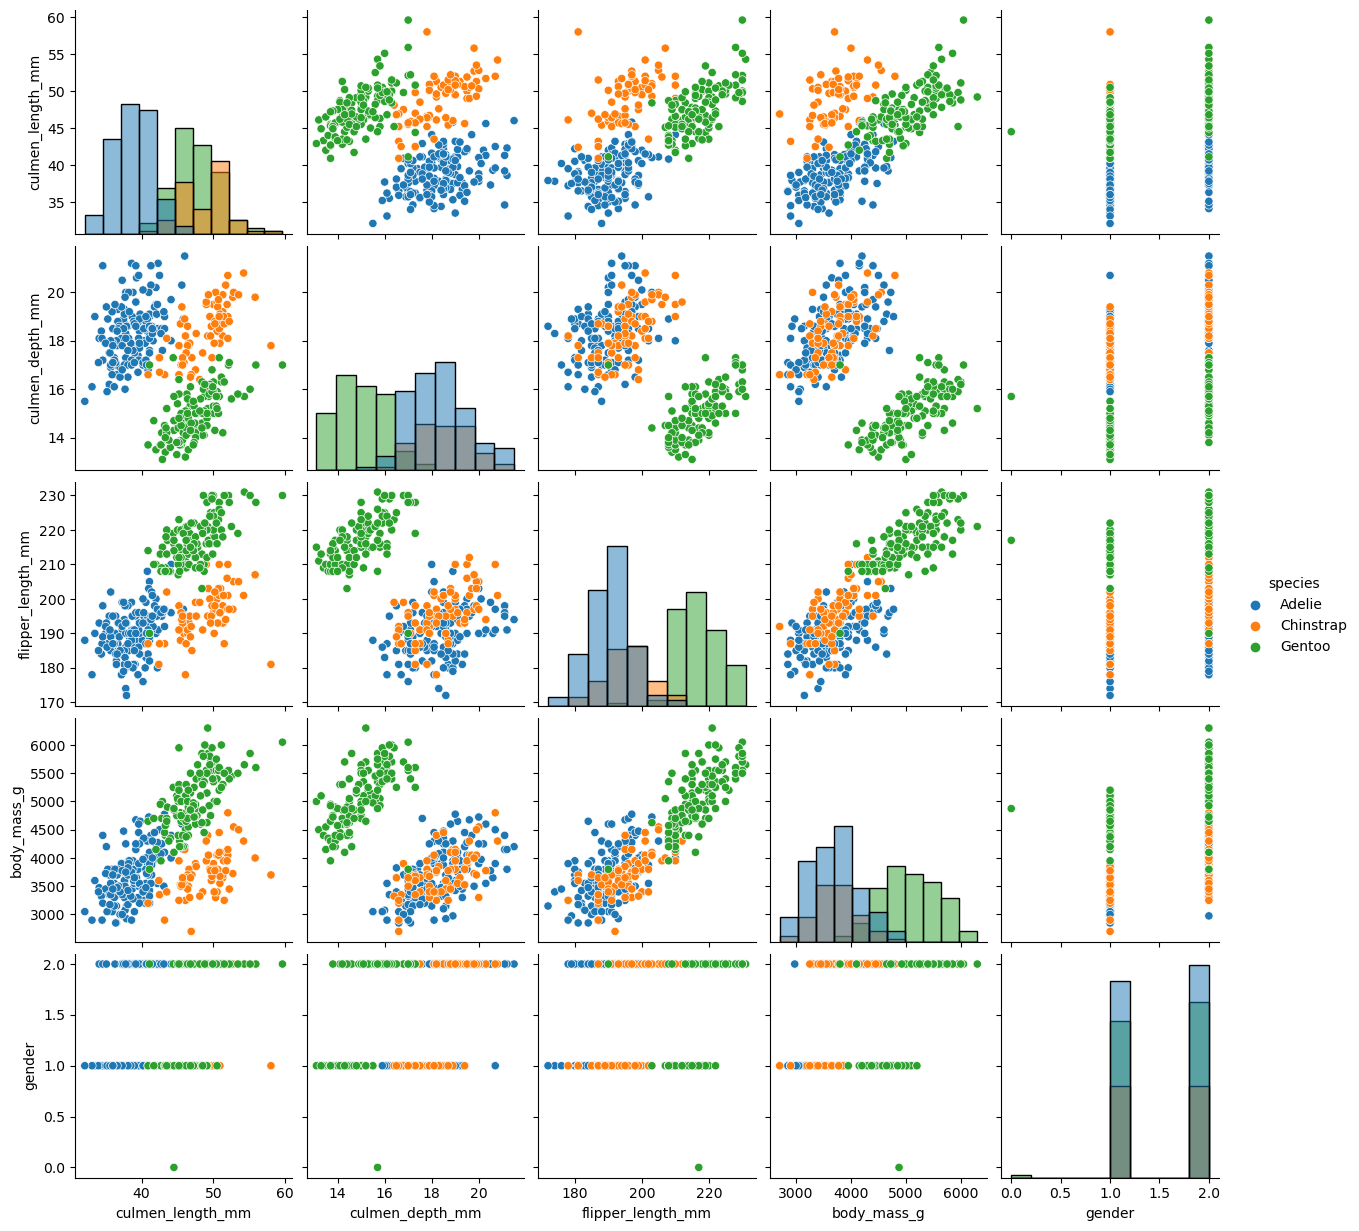

In [27]:
sns.pairplot(df, hue='species', diag_kind='hist')

In [28]:
## Machine Learning

In [29]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [33]:
island = pd.get_dummies(df[['island']], drop_first=True)
island.head()

,island_Dream,island_Torgersen
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
df2 = pd.concat([df,island], axis=1).drop(['island'], axis=1)
df2.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,1
3,Adelie,41.1,17.0,190.0,3800.0,2,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,1


In [39]:
target, features = df2.species, df2.drop(['species'], axis=1)


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [43]:
scaler = StandardScaler()

In [49]:
scaler.fit(features.iloc[:,:4])
features.iloc[:,:4] = scaler.transform(features.iloc[:,:4])
features.iloc[:,:4]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.883375,0.788176,-1.415471,-0.562452
1,-0.809845,0.127001,-1.058960,-0.499877
2,-0.662785,0.432159,-0.417242,-1.188208
3,-0.515725,-0.076437,-0.773752,-0.499877
4,-1.324555,1.093334,-0.559846,-0.937906
...,...,...,...,...
339,-0.515725,-0.076437,-0.773752,-0.499877
340,0.532077,-1.449647,1.008800,0.814210
341,1.193847,-0.737612,1.507915,1.940570
342,0.237957,-1.195349,0.794894,1.252239


In [51]:
le = LabelEncoder()

In [53]:
target_encoded = le.fit_transform(target)
target_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [54]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test =train_test_split(features, target_encoded, test_size=0.2, random_state=55)

In [61]:
x_train.shape

(275, 7)

In [62]:
x_test.shape

(69, 7)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [65]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
pred_y = tree.predict(x_test)

In [68]:
con_matrix = confusion_matrix(y_test, pred_y)

<Axes: >

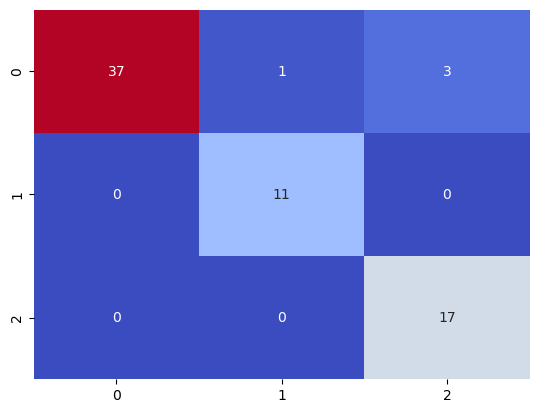

In [73]:
sns.heatmap(con_matrix, annot=True, cmap="coolwarm", cbar=False)

In [77]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           1       0.92      1.00      0.96        11
           2       0.85      1.00      0.92        17

    accuracy                           0.94        69
   macro avg       0.92      0.97      0.94        69
weighted avg       0.95      0.94      0.94        69

